<a href="https://colab.research.google.com/github/akankshaj-8799/Final-Year-Project/blob/main/Analysis_on_covid_19_India_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
#uploading file to google collab - Currently No file
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['C19India.csv']))
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
# checking the info (didnt run this cell)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15554 entries, 0 to 15553
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       15554 non-null  int64 
 1   Date                      15554 non-null  object
 2   Time                      15554 non-null  object
 3   State/UnionTerritory      15554 non-null  object
 4   ConfirmedIndianNational   15554 non-null  object
 5   ConfirmedForeignNational  15554 non-null  object
 6   Cured                     15554 non-null  int64 
 7   Deaths                    15554 non-null  int64 
 8   Confirmed                 15554 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


In [ ]:
#converting date in object form into date-time format
df = pd.read_csv('covid_19_india (1).csv',parse_dates=['Date'])
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15554 entries, 0 to 15553
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       15554 non-null  int64         
 1   Date                      15554 non-null  datetime64[ns]
 2   Time                      15554 non-null  object        
 3   State/UnionTerritory      15554 non-null  object        
 4   ConfirmedIndianNational   15554 non-null  object        
 5   ConfirmedForeignNational  15554 non-null  object        
 6   Cured                     15554 non-null  int64         
 7   Deaths                    15554 non-null  int64         
 8   Confirmed                 15554 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.1+ MB


In [ ]:
#Removing unnecessary column
df.drop (['ConfirmedIndianNational','Sno','ConfirmedForeignNational','Time'],axis = 1, inplace= True)
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
#renaming the column name
df.rename(columns ={"State/UnionTerritory":"State","Cured":"Recovered"},inplace=True)
df.head()

,Date,State,Recovered,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
active = df['Confirmed'] - df['Recovered'] - df['Deaths']
df['Active'] = active
df.head()

,Date,State,Recovered,Deaths,Confirmed,Active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [ ]:
###in series form
tot_active = df.groupby('State')['Active'].sum().sort_values(ascending=False)
tot_active.head()

State
Maharashtra      70445014
Karnataka        31617246
Kerala           27434712
Tamil Nadu       16660851
Uttar Pradesh    16643989
Name: Active, dtype: int64

In [ ]:
###in frame form
tot_active = df.groupby('State')['Active'].sum().sort_values(ascending=False).to_frame().reset_index()
tot_active.head()

,Active
State,
Maharashtra,70445014
Karnataka,31617246
Kerala,27434712
Tamil Nadu,16660851
Uttar Pradesh,16643989


In [ ]:
tot_active.style.background_gradient(cmap='GnBu_r')

,Active
State,
Maharashtra,70445014
Karnataka,31617246
Kerala,27434712
Tamil Nadu,16660851
Uttar Pradesh,16643989
Andhra Pradesh,15551477
West Bengal,10358995
Rajasthan,10229468
Chhattisgarh,9530118


In [ ]:
tot_confirmed = df.groupby('State')['Confirmed'].sum().sort_values(ascending=False).to_frame()
tot_confirmed.head()

,Confirmed
State,
Maharashtra,694600743
Karnataka,287549264
Andhra Pradesh,258280340
Tamil Nadu,257278752
Kerala,244039923


In [ ]:
tot_confirmed.style.background_gradient(cmap='RdGy')

,Confirmed
State,
Maharashtra,694600743
Karnataka,287549264
Andhra Pradesh,258280340
Tamil Nadu,257278752
Kerala,244039923
Uttar Pradesh,191544787
Delhi,185426260
West Bengal,156986842
Odisha,95247689


In [ ]:
tot_recovered = df.groupby('State')['Recovered'].sum().sort_values(ascending=False).to_frame()
tot_recovered.head()

,Recovered
State,
Maharashtra,608914337
Karnataka,252315769
Andhra Pradesh,240690360
Tamil Nadu,236973258
Kerala,215699978


In [ ]:
tot_recovered.style.background_gradient(cmap='PuBu')

,Recovered
State,
Maharashtra,608914337
Karnataka,252315769
Andhra Pradesh,240690360
Tamil Nadu,236973258
Kerala,215699978
Delhi,173530028
Uttar Pradesh,172344187
West Bengal,144027845
Odisha,88556734


In [ ]:
tot_deaths = df.groupby('State')['Deaths'].sum().sort_values(ascending=False).to_frame()
tot_deaths.head()

,Deaths
State,
Maharashtra,15241392
Tamil Nadu,3644643
Karnataka,3616249
Delhi,3173315
West Bengal,2600002


In [ ]:
tot_deaths.style.background_gradient(cmap='Pastel2')

,Deaths
State,
Maharashtra,15241392
Tamil Nadu,3644643
Karnataka,3616249
Delhi,3173315
West Bengal,2600002
Uttar Pradesh,2556611
Andhra Pradesh,2038503
Punjab,1653605
Gujarat,1506626


In [ ]:
### Total vs Cured Plot
df.head()

,Date,State,Recovered,Deaths,Confirmed,Active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [ ]:
data = df[['State','Confirmed','Active','Deaths','Recovered']]
data.head()

,State,Confirmed,Active,Deaths,Recovered
0,Kerala,1,1,0,0
1,Kerala,1,1,0,0
2,Kerala,2,2,0,0
3,Kerala,3,3,0,0
4,Kerala,3,3,0,0


In [ ]:
data.sort_values('Active',ascending=False,inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,Confirmed,Active,Deaths,Recovered
14134,Maharashtra,4094840,701614,62479,3330747
14242,Maharashtra,4295027,700207,64760,3530060
14098,Maharashtra,4027827,697467,61911,3268449
14206,Maharashtra,4228836,696298,63928,3468610
14170,Maharashtra,4161676,693632,63252,3404792


In [ ]:
data.sort_values('Confirmed',ascending=False,inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,Confirmed,Active,Deaths,Recovered
15538,Maharashtra,5746892,256178,95344,5395370
15502,Maharashtra,5731815,274601,94844,5362370
15466,Maharashtra,5713215,279347,94030,5339838
15430,Maharashtra,5692920,291848,93198,5307874
15394,Maharashtra,5672180,303752,92225,5276203


In [ ]:
data.sort_values('Recovered',ascending=False,inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,Confirmed,Active,Deaths,Recovered
15538,Maharashtra,5746892,256178,95344,5395370
15502,Maharashtra,5731815,274601,94844,5362370
15466,Maharashtra,5713215,279347,94030,5339838
15430,Maharashtra,5692920,291848,93198,5307874
15394,Maharashtra,5672180,303752,92225,5276203


In [ ]:
data.sort_values('Deaths',ascending=False,inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,Confirmed,Active,Deaths,Recovered
15538,Maharashtra,5746892,256178,95344,5395370
15502,Maharashtra,5731815,274601,94844,5362370
15466,Maharashtra,5713215,279347,94030,5339838
15430,Maharashtra,5692920,291848,93198,5307874
15394,Maharashtra,5672180,303752,92225,5276203


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

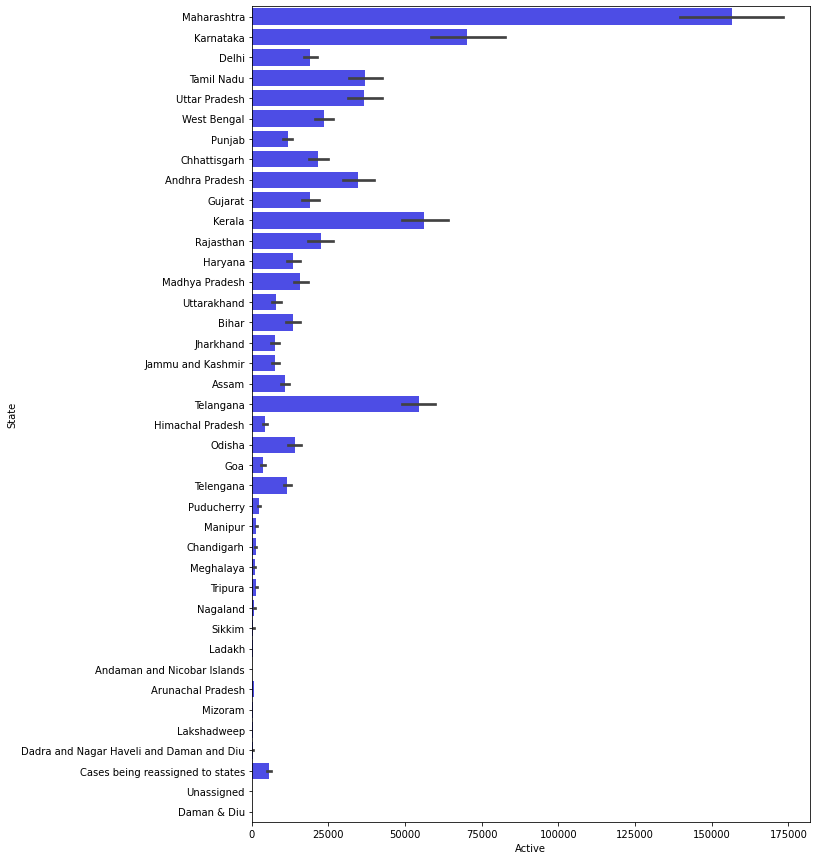

In [ ]:
### plot active cases vs state
plt.figure(figsize=(10,15))
sns.barplot(data['Active'],data['State'],color='Blue',label='Active',alpha=0.8)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

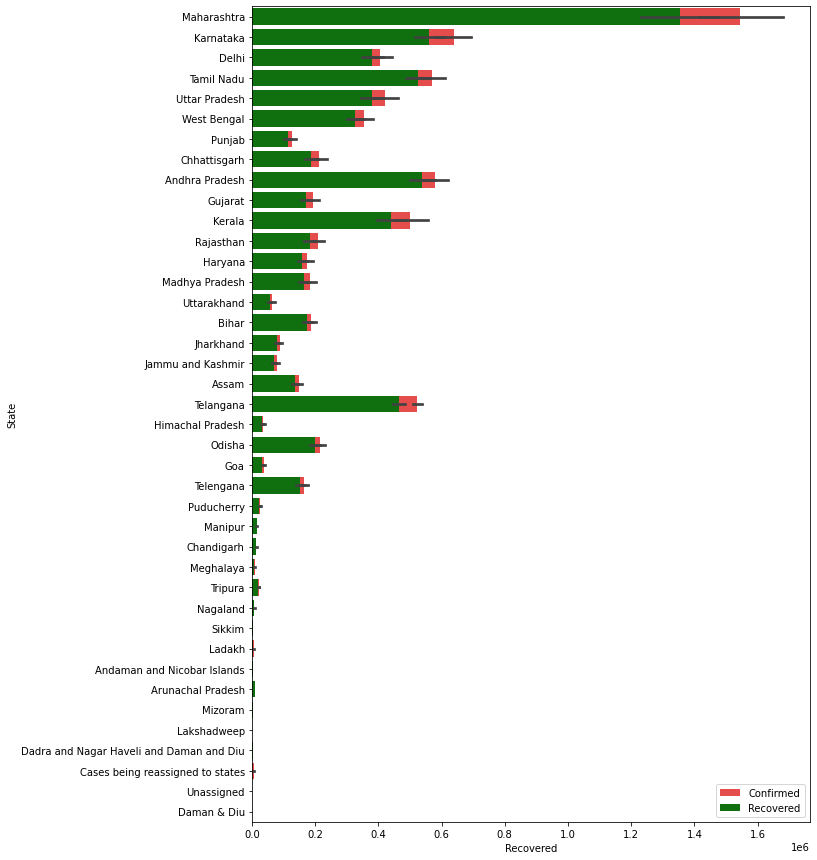

In [ ]:
### plot confirmed cases vs recovered cases
plt.figure(figsize=(10,15))
sns.barplot(data['Confirmed'],data['State'],color='red',label='Confirmed',alpha=0.8)
sns.barplot(data['Recovered'],data['State'],color='green',label='Recovered')
plt.legend(loc=4)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

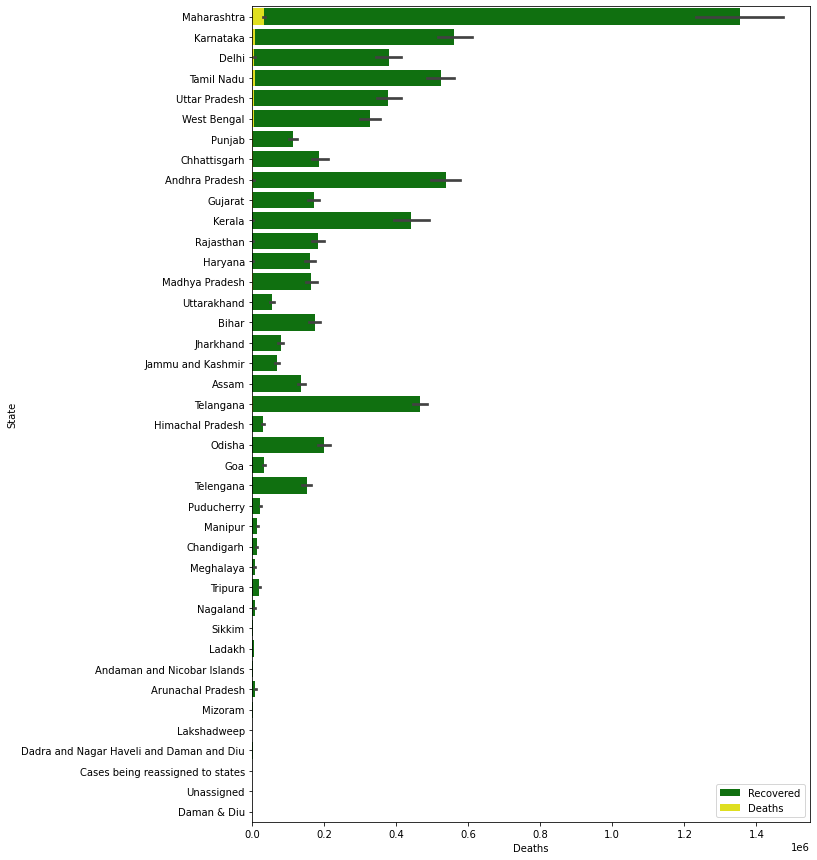

In [ ]:
### plot Deaths vs recovered cases
plt.figure(figsize=(10,15))
sns.barplot(data['Recovered'],data['State'],color='green',label='Recovered')
sns.barplot(data['Deaths'],data['State'],color='yellow',label='Deaths')
plt.legend(loc=4)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

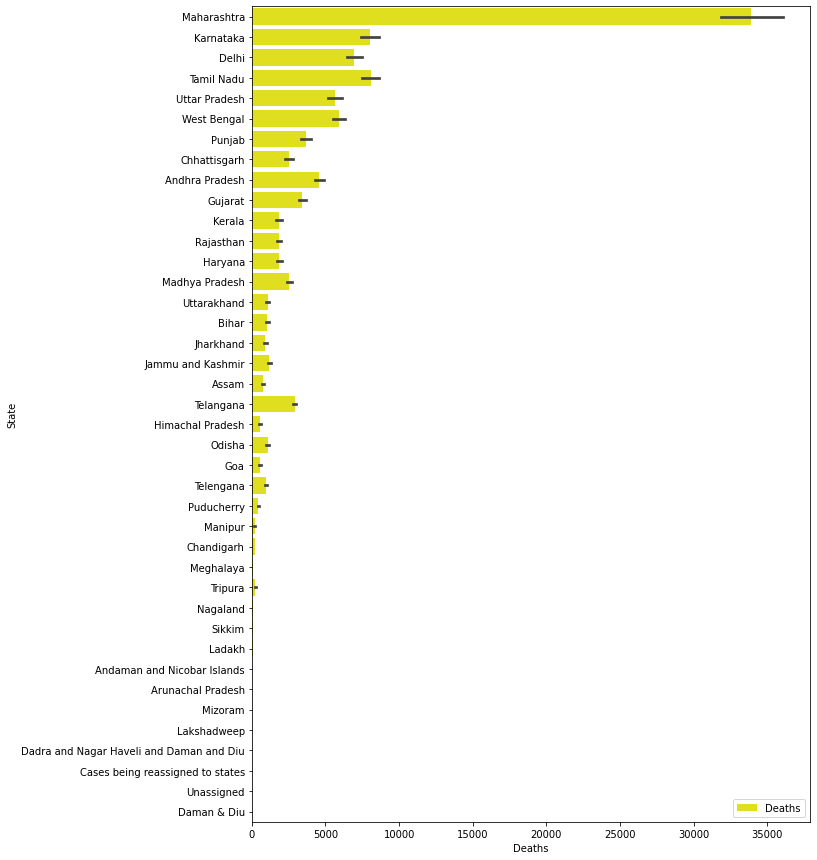

In [ ]:
### plot Deaths vs state
plt.figure(figsize=(10,15))
sns.barplot(data['Deaths'],data['State'],color='yellow',label='Deaths')
plt.legend(loc=4)
plt.show